We are importing the dataset from the local


In [3]:
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman (1).csv


#Introduction about dataset#
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute)

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

 https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1 

The axillary lymph nodes or armpit lymph nodes are lymph nodes in the human armpit. Between 20 and 49 in number, they drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb. They are divided in several groups according to their location in the armpit. These lymph nodes are clinically significant in breast cancer, and metastases from the breast to the axillary lymph nodes are considered in the staging of the disease.   https://en.wikipedia.org/wiki/Axillary_lymph_nodes 



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

haberman=pd.read_csv('haberman.csv')
haberman.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


We could observe that  we have 307 rows and 4 columns. We just wanted to see the size of the data.

In [6]:
haberman.columns


Index(['age', 'year', 'nodes', 'status'], dtype='object')

status is the dependent variable and rest all others are independent variables

In [7]:

haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64


This is imbalanced dataset

In [8]:
haberman_df=pd.DataFrame(data=haberman)
haberman_df
max_val=haberman_df.max()
print(max_val)

age       83
year      69
nodes     52
status     2
dtype: int64


We wanted to see the maximum values of all the columns, just to check the maximum value in nodes and age, anyways plotting would be the best method .

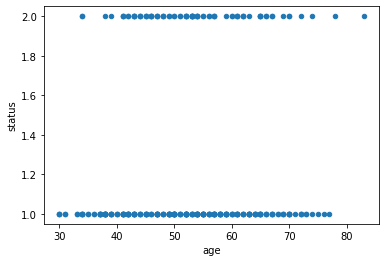

In [9]:

haberman_df.plot(kind='scatter', x='age',y='status')

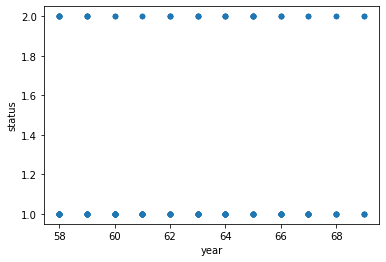

In [10]:



haberman_df.plot(kind='scatter', x='year',y='status')






From the above 2 plots we observed that we cannot classify based on only age or only node as the data is distributed irrespective of the 2 features.

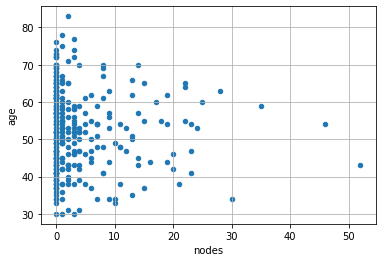

In [11]:
haberman_df.plot(kind='scatter', x='nodes',y='age')
plt.grid()

We will not be able to confirm unless we have colors. Hence we will use seaborn

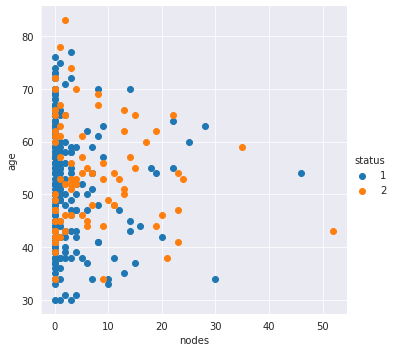

In [12]:

sns.set_style('darkgrid')
sns.FacetGrid(haberman_df, hue="status", height=5).map(plt.scatter, "nodes", "age") .add_legend();
plt.show();


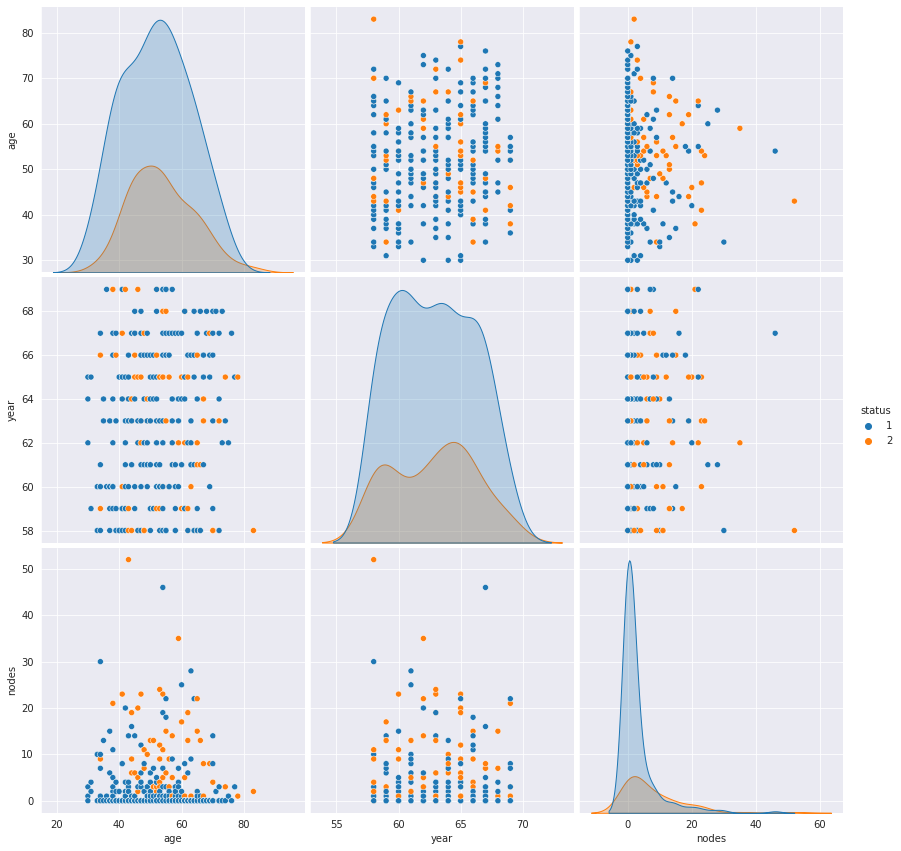

In [13]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(haberman_df, hue='status', palette='tab10',kind='scatter',height=4);
plt.show()


From the above diagram we can conclude that there is lot of overlapping in all the combinations but plot 7 is little acceptable.Anyways plot 3 and plot 7 are same there is just interchange between and y axis

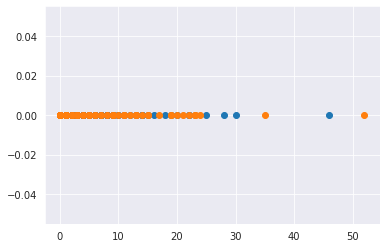

In [14]:
haberman_1=haberman_df.loc[haberman_df['status']==1];
haberman_2=haberman_df.loc[haberman_df['status']==2];
#print(haberman_1['nodes'])
plt.plot(haberman_1['nodes'], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2['nodes'], np.zeros_like(haberman_2['nodes']), 'o')
#plt.plot()
plt.show()
#haberman_2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


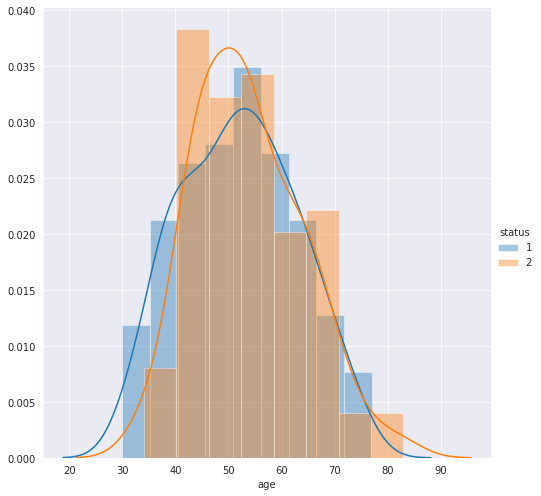

In [15]:
sns.FacetGrid(haberman_df, hue='status', height=7).map(sns.distplot, 'age').add_legend()


We could observe that they are more overlaps which will convey that patient survival is independent of persons age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


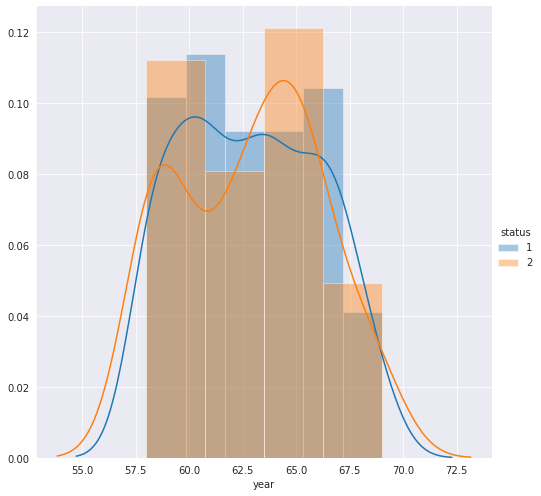

In [16]:
sns.FacetGrid(haberman_df, hue='status', height=7).map(sns.distplot, 'year').add_legend()

We could observe that they are more overlaps which will convey that patient survival is independent of operated year

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


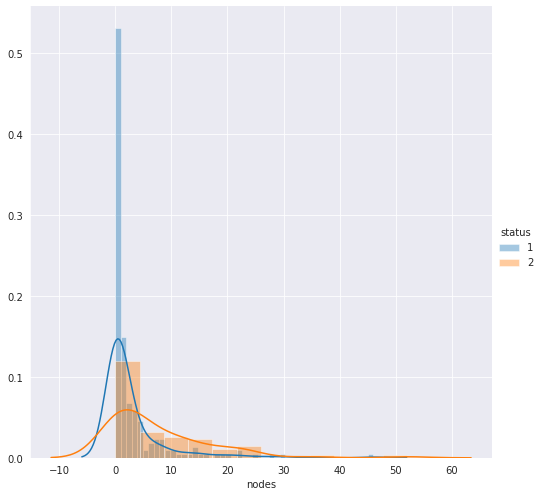

In [17]:
sns.FacetGrid(haberman_df, hue='status', height=7).map(sns.distplot, 'nodes').add_legend()

In the above graph we could observe that the patient with least number of nodes or no nodes have good chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


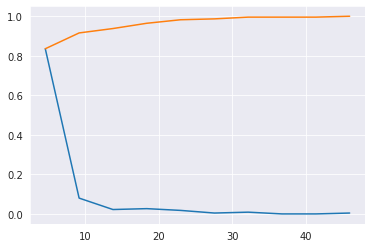

In [18]:

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



It is observed that there is  around 83% of patients survived for longer duration if the number of nodes is < 2. and it is clear that the as the node increases the chances of survival is less.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


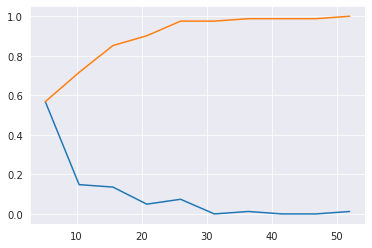

In [19]:
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


From the above cdf we can conclude that around  58% of the patients survived whose nodes is less than 4.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


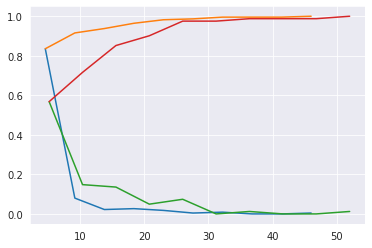

In [20]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


In [21]:
print("Mean")
print(np.mean(haberman_1['nodes']))
#Mean with an outlier.
print(np.mean(np.append(haberman_1['nodes'],50)));
print(np.mean(haberman_2['nodes']))

print("\n\nStandard Deviation:");
print(np.std(haberman_1['nodes']))
print(np.std(haberman_2['nodes']))

Mean
2.7911111111111113
3.0
7.45679012345679


Standard Deviation:
5.857258449412131
9.128776076761632


We could see that there is no much difference between the mean with outlier and the mean without outlier. Hence there is no impact of outiers on the points with status=1, but there there is significant difference in the mean for the points with status=2. In case of standard deviation we could that there is more spread for the points of less survival.

In [22]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1['nodes']))
print(np.median(haberman_2['nodes']))



print("\nQuantiles:")
print(np.percentile(haberman_1['nodes'],np.arange(0, 100, 25)))
print(np.percentile(haberman_2['nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1['nodes'],90))
print(np.percentile(haberman_2['nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1['nodes']))
print(robust.mad(haberman_2['nodes']))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. We could observe that the average is 0 for patients who have long survival and the average is 4 for short survival
2. We could see that for long survival 25% of the points have more than 3 nodes and for short survival 25% of the points have more than 11 nodes
3. Similarly for 90th percentile the nodes is more than 8 for long survival and 20 for short survival
4. We have MAD(average distance between each data point and the mean) as 0 for long survival and 5.93 for short survival

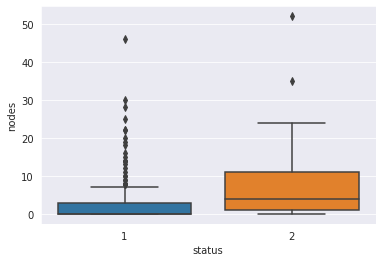

In [23]:
sns.boxplot(x='status',y='nodes', data=haberman_df)
plt.show()

We could see that the upper extreme is 8 for the long survival  and around 24 for long survival, as the median is 0, 25th and 50th percentile is same. In case of short survival there are more points after 11.

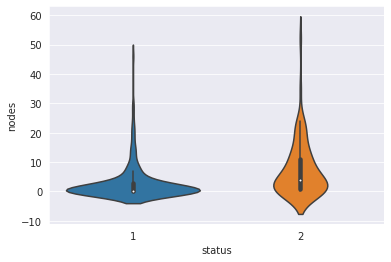

In [25]:
sns.violinplot(x="status", y="nodes", data=haberman_df, size=8)
plt.show()

1. We could observe that for long survival the denisity is more near the median and for short survival the denisity lies between 0 to 18

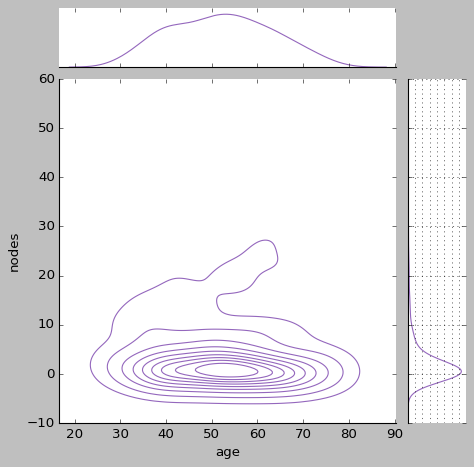

In [40]:
plt.style.use('classic')
sns.jointplot(x='age', y='nodes', data=haberman_1, kind='kde', palette='autumn', color='tab:purple');

plt.grid()
plt.show();

 The denisity of the points for age in long survival is more from 45 to 60 and nodes from 0 to 3

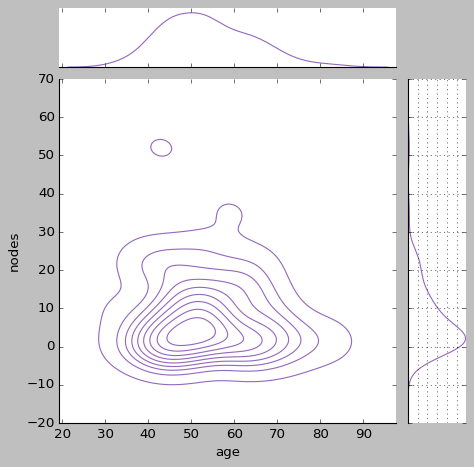

In [41]:
plt.style.use('classic')
sns.jointplot(x='age', y='nodes', data=haberman_2, kind='kde', palette='autumn', color='tab:purple');

plt.grid()
plt.show();

The denisity of the points for age in short survival is more from 45 to 60 and nodes from 0 to 12

#Conclusion#

1. We can diagonize the cancer with various data analysis techniques, but it is not easy as the dataset is imblanced
2. We cannot based on age and operation year alone
3. We can fairly conclude that the chances of survival is less as the number of nodes increases, yet absence of nodes also do not guarntee survival.